# Part II - Explanatory Data Visualization: Prosper Loan Dataset
## by David Alobo

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)


## Investigation Overview


The goal of this investigation is to provide a short presentation that illustrates interesting properties, trends, and relationships (the outcomes) that were discovered in the selected dataset. The primary method of conveying my findings was through transforming the exploratory visualizations from the first part into polished, explanatory visualizations. This to provide key findings generated, and also communicate my results to others.

## Dataset Overview

The Dataset for this is the Prosper Loan Data ([Download here](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub "Project 3: Udacity Project - Proper Loan Data")). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. About 10 -15 variables were explored for this project.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Key Findings

The amount borrowed and the loan's interest rate appeared to have the biggest effects on a loan's outcome. Loans with higher interest rates and higher values appear to be more prone to default. The statistics showed that employed people had the widest spread. After limiting the data to loans that were just past due or in default, the means of loan amount and borrower interest rate were compared. Below are some of the findings:

- The average loan amount for the entire dataset is USD 8337.01.
- For the entire dataset, the mean borrower interest rate was USD0.19.
- For the dataset with solely defaulted or past-due loans, the mean borrower interest rate was USD0.23.

The correlation heat matrix was used to identify the elements that had the biggest impact on the borrower's interest rate. None of the features showed a particularly strong association, but the credit score was the highest. The interest rate falls with a higher credit score for the borrower. The loan quantity does have some influence on the interest rate in a few other cases, but it's not as noticeable.

The greatest loan amounts tend to be for debt consolidation and child adoption, and the more money people made, the bigger the loan appears to be.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## (Visualization 1)

> The amount borrowed and the loan's interest rate appeared to have the biggest effects on a loan's outcome. Loans with higher interest rates and higher values appear to be more prone to default. The statistics showed that employed people had the widest spread. After limiting the data to loans that were just past due or in default, the means of loan amount and borrower interest rate were compared.

> The plot of the ordered income ranges shows the highest concentration of incomes between 25,000 and 74,999.

> We have a high proportion of people that are employed with more loans than every category of employment status, this shows that people that takes loan are majorly the employed ones. And Employed individuals often have higher appropriate score ratings than any other sort of employment status.

In [30]:
# Defining the color

FaV_color = sb.color_palette()[-1]
Fav_color_2 = sb.color_palette()[0]

In [31]:
#Defining the income range

Income_range_val = df["IncomeRange"].value_counts()
Income_range_val_order =Income_range_val.index 
Income_range_val_order

Index(['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
       'Not displayed', '$1-24,999', 'Not employed', '$0'],
      dtype='object')

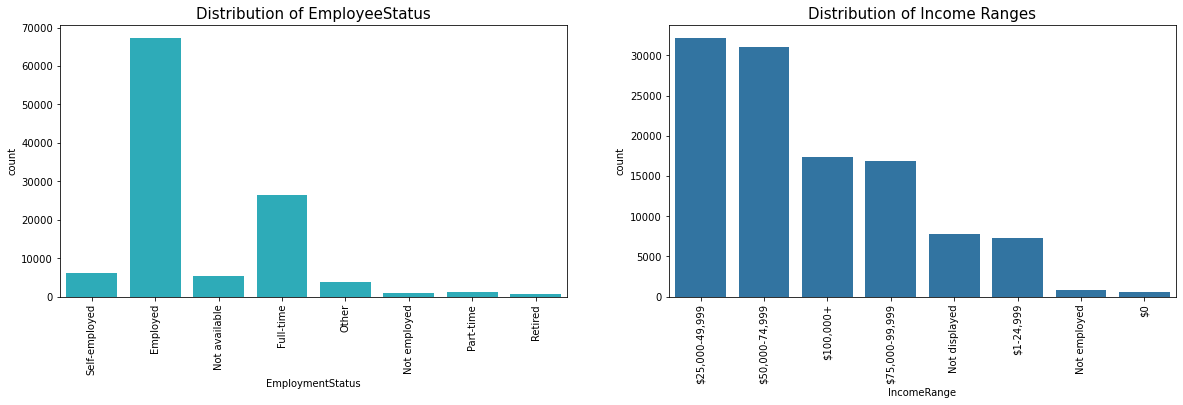

In [35]:
##Showing the distribution of incomeRange and Employment Status with respect to loans. A high proportion of the dataset distribution that are employed and with high income were observed to have more loans than others

def func_plot(data1,var1, var_2):
    plt.figure(figsize= [20,5])
    Income_range_val = df2[var_2].value_counts()
    Income_range_val_order = Income_range_val.index 
    
   
    plt.subplot(1,2,1)
    sb.countplot(data = df2 , x = var1, color= FaV_color)
    plt.xticks(rotation = 90)
    plt.title('Distribution of EmployeeStatus', fontsize = 15);
    #plt.ylabel("the No of loans taken per ",var1);

    plt.subplot(1,2,2)
    sb.countplot(data = df2 , x = var_2 , color= Fav_color_2,order= Income_range_val_order)
    plt.xticks(rotation = 90)
    plt.title('Distribution of Income Ranges', fontsize = 15);
    #plt.ylabel("the No of loans taken per ", var_2);
    
func_plot(df2,"EmploymentStatus", "IncomeRange")

## (Visualization 2)

> The amount borrowed and the loan's interest rate appeared to have the biggest effects on a loan's outcome. Loans with higher interest rates and greater values appear to be more prone to default. The biggest spread was found among employed people, which makes sense given that I believe employed people are more likely to apply for and be approved for loans.

> The interest rate falls as the borrower's credit score rises. The interest rate represents the risk and therefore, the lower the risk, the lower the interest. There are a few cases when the loan size can also have an impact on the interest rate, although it's not as noticeable.

In [36]:
def Func_plot2(datas, var1,var2):
    plt.figure(figsize=[18,4])
    plt.subplot(1,2,1)
    sb.violinplot(data = df2 , x = var1, y =var2, color=Fav_color_2)
    plt.title('ProsperScore against IncomeRange')
    plt.xticks(rotation = 45)

    plt.subplot(1,2,2)
    sb.boxplot(data = df2 , x = var1, y =var2, color=Fav_color_2)
    plt.title('ProsperScore against IncomeRange')
    plt.xticks(rotation = 45)


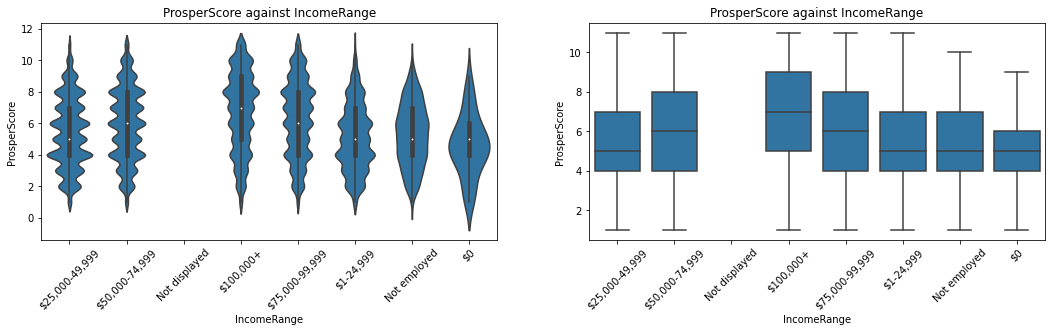

In [37]:
Func_plot2(df2,"IncomeRange", "ProsperScore")

## (Visualization 3)

> The loans that are past due tend to have a larger difference in the loan amount and in the interest rate of the loan. And cancelled loans tended to have lower loan amounts and lower interest rates. Those are probably easier to cancel since would have less of a negative impact on the lender.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

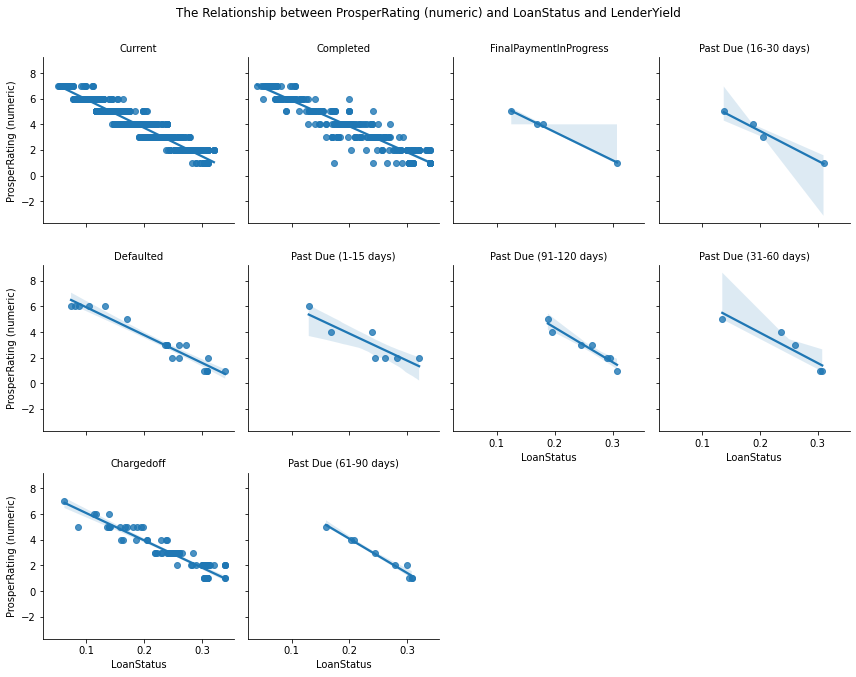

In [835]:
#Defining a function to show the relationship between "ProsperRating (numeric)" and the "LoanStatus", and "lenderYield" Respectively

def facet_plot():
    d = sb.FacetGrid(data = df3 , col= "LoanStatus" , col_wrap= 4 , col_order=loan_inex)
    d.map(sb.regplot, "LenderYield", "ProsperRating (numeric)")
    d.set_axis_labels(x_var="LoanStatus", y_var="ProsperRating (numeric)")
    plt.suptitle("The Relationship between ProsperRating (numeric) and LoanStatus and LenderYield", y = 1.04)
    d.set_titles("{col_name}");
    
facet_plot()

In [26]:
!jupyter nbconvert Prosper Loan Dataset Slide.ipynb --to slides --post serve --no-input --template output_toggle.tpl

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Prosper' matched no files
[NbConvertApp] WARNING | pattern 'Loan' matched no files
[NbConvertApp] WARNING | pattern 'Dataset' matched no files
[NbConvertApp] WARNING | pattern 'Slide.ipynb' matched no files


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 